<a href="https://colab.research.google.com/github/mariachurches/PythonIA/blob/main/PracticaFinal/01MIAR_ACT_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#01MIAR - Actividad Final

###Autor: María Iglesias Veiga

Indice:
1. Descripción del proyecto y objetivos
2. Preparación del entorno
3. Preparación de los datos

  3.1 Carga del dataset

  3.2 Comprensión de los datos
  
  3.3 Limpieza y optimización de datos
4. Análisis general 
5. Exploración de los datos 
6. Concusiones
7. Trabajo futuro


## 1. Descripción del proyecto y objetivos
En esta actividad se pretende demostrar el conocimiento obtenido en las clases, teniendo como objetivo la exploración, tratamiento, evaluación y visualización de un conjunto de datos a través del uso de distintas librerias de Python.

El conjunto de datos seleccionado es heart_2020_cleaned.csv, obtenido de la siguiente fuente: https://www.kaggle.com. Este dataset contiene un total de 319795 intancias, compuestas por 18 atributos:
- 9 de carácter booleano: Smoking, AlcoholDrinking, DiffWalking, Asthma, KidneyDisease, SkinCancer, PhysicalActivity, Diabetic, Stroke.
- 5 de carácter linguistico: Sex, Age-Category, Race, GenHealth.
- 4 de carácter numérico: SleepTime, MentalHealth, PhysicalHealth, BMI.

El objetivo principal es conseguir determinar que atributos de los anteriormente comentados son factores de riesgo más significativos a la hora de sufrir un infarto y determinar aquellos atributos que no tengan influencia o tengan una influencia menor sobre este hecho.

## 2. Preparación del entorno
Gracias a google colab solo necesitaremos para tener un entorno totalemente preparado la importación de las librerías de Python necesarías para el desarrollo del presente proyecto.

In [36]:
#Librerias necesarias para el trabajo final
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

##3. Preparación de los datos
En esta sección importaremos, prepararemos y entenderemos el conjunto de datos seleccionado para el posterior analisis del mismo.

###3.1 Carga del dataset

In [37]:
#Carga de datos
data_heart = pd.read_csv('/content/heart_2020_cleaned.csv')

In [38]:
#Comprobamos que los datos se hayan cargado correctamente
data_heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### 3.2 Comprensión de los datos

In [39]:
data_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [40]:
print("Hay un total de %d instancias y %i atributos" % (data_heart.shape[0],data_heart.shape[1]), end='.\n')
display(data_heart)

Hay un total de 319795 instancias y 18 atributos.


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [48]:
for atributo in data_heart.columns:
  print(f"Los posibles valores del atributo {atributo} son {data_heart[atributo].unique()} \n")

Los posibles valores del atributo HeartDisease son ['No' 'Yes'] 

Los posibles valores del atributo BMI son [16.6  20.34 26.58 ... 62.42 51.46 46.56] 

Los posibles valores del atributo Smoking son ['Yes' 'No'] 

Los posibles valores del atributo AlcoholDrinking son ['No' 'Yes'] 

Los posibles valores del atributo Stroke son ['No' 'Yes'] 

Los posibles valores del atributo PhysicalHealth son [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.] 

Los posibles valores del atributo MentalHealth son [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.] 

Los posibles valores del atributo DiffWalking son ['No' 'Yes'] 

Los posibles valores del atributo Sex son ['Female' 'Male'] 

Los posibles valores del atributo AgeCategory son ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29'] 

Los 

###3.3 Limpieza y optimización de datos

In [42]:
#Comprobar si existen valores nulos
print(f"Número total de filas = {len(data_heart)}")
print(data_heart.isna().sum())

if data_heart.isnull().values.any():
  print("Existen valores nulos en el conjunto de datos")
else:
  print("No existen valores nulos en el conjunto de datos")

Número total de filas = 319795
HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64
No existen valores nulos en el conjunto de datos


Modificaremos la columna Diabetic para facilitar el futuro analisis asigando los siguientes valores:

0 - Tuvo diabetes

1 - Tuvo diabetes durante el embarazo

2 - No llego a tener diabetes pero estuvo cerca

3 - No tuvo diabte

In [46]:
data_heart["Diabetic"] = data_heart["Diabetic"].replace("Yes"                         , 0)
data_heart["Diabetic"] = data_heart["Diabetic"].replace("Yes (during pregnancy)"      , 1)
data_heart["Diabetic"] = data_heart["Diabetic"].replace("No, borderline diabetes"     , 2)
data_heart["Diabetic"] = data_heart["Diabetic"].replace("No"                          , 3)

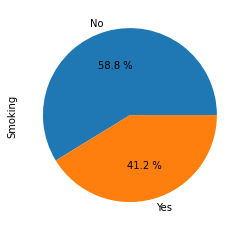

In [44]:
#Visualización de los datos
data_heart["Smoking"].value_counts().plot(kind='pie', autopct="%0.1f %%")

In [45]:
with_heartDisease = data_heart.groupby('AgeCategory')['HeartDisease'].value_counts().iloc[1::2]
values = with_heartDisease.values
index=list([i[0] for i in with_heartDisease.index])
print(index)
print(values)

['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']
[ 130  133  226  296  486  744 1383 2202 3327 4101 4847 4049 5449]
